## RNN- Recurrent Neural Network

In [1]:
%matplotlib inline
%env KERAS_BACKEND = tensorflow

import time
import locale
import random
import keras
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from ipywidgets import interact
from ipywidgets import interact_manual
from sklearn.linear_model import LinearRegression
from matplotlib.font_manager import FontProperties
from sklearn.model_selection import train_test_split

myfont = FontProperties(fname = r'c:\windows\fonts\simsun.ttc', size = 14)

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


In [2]:
# 由 Keras 讀入 IMDB
from keras.datasets import imdb

#RNN
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD, Adam

# something userful
from keras.utils import np_utils
from keras.preprocessing import sequence

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [3]:
print('訓練總筆數',len(x_train))

訓練總筆數 25000


In [4]:
print('測試總筆數',len(x_test))

測試總筆數 25000


In [5]:
y_train[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [6]:
len(x_train[24999])

153

In [7]:
x_train_maxlen = sequence.pad_sequences(x_train, maxlen=150)
x_test_maxlen = sequence.pad_sequences(x_test, maxlen=150)

In [8]:
x_train.shape

(25000,)

In [9]:
N1 = 2 #文字要壓到N維 (2^1)
K1 = 4 #LSTM有K個神經元 (2^2)

## 建構神經網路

## 【Model 1】打開一個空白的神經網路。

In [10]:
model_01 = Sequential()

In [11]:
model_01.add(Embedding(10000,N1))
model_01.add(LSTM(K1))

model_01.add(Dense(1, activation='sigmoid'))

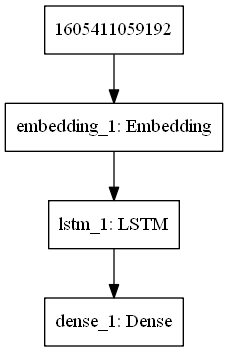

In [12]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import pydot
from keras.utils.vis_utils import plot_model
plot_model(model_01, to_file='Q10-1_RNN_model_01.png')
from IPython.display import Image
Image(filename="Q10-1_RNN_model_01.png")

## 【Compile & Training】

In [13]:
model_01.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
model_01.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 2)           20000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 20,117
Trainable params: 20,117
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_01_result = model_01.fit(x_train_maxlen, y_train, batch_size = 32, epochs = 5, validation_data = (x_test_maxlen,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 99s 4ms/step - loss: 0.5178 - acc: 0.7466 - val_loss: 0.3658 - val_acc: 0.8528
Epoch 2/5
25000/25000 [==============================] - 97s 4ms/step - loss: 0.2927 - acc: 0.8876 - val_loss: 0.3625 - val_acc: 0.8456
Epoch 3/5
25000/25000 [==============================] - 98s 4ms/step - loss: 0.2261 - acc: 0.9187 - val_loss: 0.3397 - val_acc: 0.8603
Epoch 4/5
25000/25000 [==============================] - 98s 4ms/step - loss: 0.1925 - acc: 0.9339 - val_loss: 0.3502 - val_acc: 0.8582
Epoch 5/5
25000/25000 [==============================] - 100s 4ms/step - loss: 0.1660 - acc: 0.9461 - val_loss: 0.3750 - val_acc: 0.8549


## 【Model 2】

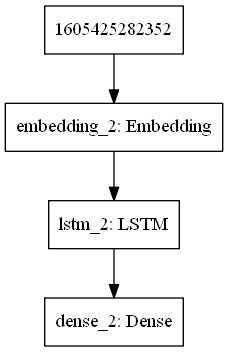

In [16]:
N2 = 4 #文字要壓到N維 (2^2)
K2 = 8 #LSTM有K個神經元 (2^3)

model_02 = Sequential()

model_02.add(Embedding(10000,N2))
model_02.add(LSTM(K2))

model_02.add(Dense(1, activation='sigmoid'))

model_02.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

from keras.utils.vis_utils import plot_model
plot_model(model_02, to_file='Q10-1_RNN_model_02.png')
Image(filename="Q10-1_RNN_model_02.png")

In [17]:
model_02_result = model_02.fit(x_train_maxlen, y_train, batch_size = 32, epochs = 5, validation_data = (x_test_maxlen,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 104s 4ms/step - loss: 0.5166 - acc: 0.7510 - val_loss: 0.3889 - val_acc: 0.8333
Epoch 2/5
25000/25000 [==============================] - 97s 4ms/step - loss: 0.3090 - acc: 0.8777 - val_loss: 0.3459 - val_acc: 0.8576
Epoch 3/5
25000/25000 [==============================] - 104s 4ms/step - loss: 0.2328 - acc: 0.9102 - val_loss: 0.3381 - val_acc: 0.8566
Epoch 4/5
25000/25000 [==============================] - 101s 4ms/step - loss: 0.1917 - acc: 0.9320 - val_loss: 0.3648 - val_acc: 0.8546
Epoch 5/5
25000/25000 [==============================] - 102s 4ms/step - loss: 0.1678 - acc: 0.9422 - val_loss: 0.3788 - val_acc: 0.8543


In [18]:
model_02.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 4)           40000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 416       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 40,425
Trainable params: 40,425
Non-trainable params: 0
_________________________________________________________________


## 【Model 3】當 N < K時反而讓準確率降低

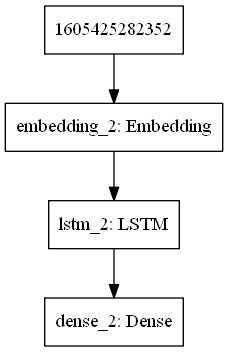

In [19]:
N3 = 128 #文字要壓到N維 (2^7)
K3 = 256 #LSTM有K個神經元 (2^8)

model_03 = Sequential()

model_03.add(Embedding(10000,N3))
model_03.add(LSTM(K3))

model_03.add(Dense(1, activation='sigmoid'))

model_03.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

from keras.utils.vis_utils import plot_model
plot_model(model_03, to_file='Q10-1_RNN_model_03.png')
Image(filename="Q10-1_RNN_model_03.png")

In [20]:
model_03_result = model_03.fit(x_train_maxlen, y_train, batch_size = 32, epochs = 5, validation_data = (x_test_maxlen,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 537s 21ms/step - loss: 0.4560 - acc: 0.7862 - val_loss: 0.3535 - val_acc: 0.8504
Epoch 2/5
25000/25000 [==============================] - 311s 12ms/step - loss: 0.2769 - acc: 0.8880 - val_loss: 0.3500 - val_acc: 0.8482
Epoch 3/5
25000/25000 [==============================] - 333s 13ms/step - loss: 0.2006 - acc: 0.9223 - val_loss: 0.3617 - val_acc: 0.8544
Epoch 4/5
25000/25000 [==============================] - 339s 14ms/step - loss: 0.1445 - acc: 0.9458 - val_loss: 0.4356 - val_acc: 0.8447
Epoch 5/5
25000/25000 [==============================] - 371s 15ms/step - loss: 0.0981 - acc: 0.9662 - val_loss: 0.5024 - val_acc: 0.8524


In [21]:
model_03.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 1,674,497
Trainable params: 1,674,497
Non-trainable params: 0
_________________________________________________________________


## 【Model 4】 當 N >> K 時會提升相關的準確率

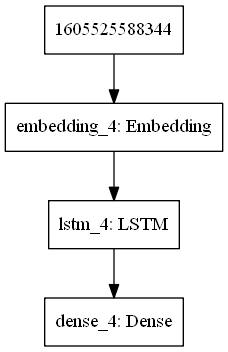

In [26]:
N4 = 256 #文字要壓到N維 (2^8)
K4 = 32 #LSTM有K個神經元 (2^5)

model_04 = Sequential()

model_04.add(Embedding(10000,N4))
model_04.add(LSTM(K4))

model_04.add(Dense(1, activation='sigmoid'))

model_04.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

from keras.utils.vis_utils import plot_model
plot_model(model_04, to_file='Q10-1_RNN_model_04.png')
Image(filename="Q10-1_RNN_model_04.png")

In [27]:
model_04_result = model_04.fit(x_train_maxlen, y_train, batch_size = 32, epochs = 5, validation_data = (x_test_maxlen,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 110s 4ms/step - loss: 0.4116 - acc: 0.8115 - val_loss: 0.3195 - val_acc: 0.8648
Epoch 2/5
25000/25000 [==============================] - 127s 5ms/step - loss: 0.2333 - acc: 0.9078 - val_loss: 0.3173 - val_acc: 0.8694
Epoch 3/5
25000/25000 [==============================] - 150s 6ms/step - loss: 0.1635 - acc: 0.9380 - val_loss: 0.3464 - val_acc: 0.8687
Epoch 4/5
25000/25000 [==============================] - 144s 6ms/step - loss: 0.1105 - acc: 0.9599 - val_loss: 0.4109 - val_acc: 0.8614
Epoch 5/5
25000/25000 [==============================] - 134s 5ms/step - loss: 0.0808 - acc: 0.9715 - val_loss: 0.5237 - val_acc: 0.8605


In [29]:
model_04.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                36992     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 2,597,025
Trainable params: 2,597,025
Non-trainable params: 0
_________________________________________________________________


## 【Model 5】

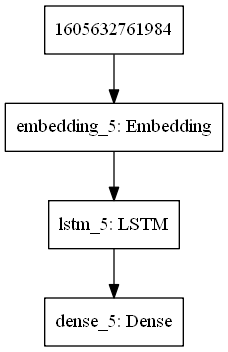

In [30]:
N5 = 128 #文字要壓到N維 (2^7)
K5 = 16 #LSTM有K個神經元 (2^4)

model_05 = Sequential()

model_05.add(Embedding(10000,N5))
model_05.add(LSTM(K5))

model_05.add(Dense(1, activation='sigmoid'))

model_05.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

from keras.utils.vis_utils import plot_model
plot_model(model_05, to_file='Q10-1_RNN_model_05.png')
Image(filename="Q10-1_RNN_model_05.png")

In [31]:
model_05_result = model_05.fit(x_train_maxlen, y_train, batch_size = 32, epochs = 5, validation_data = (x_test_maxlen,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 98s 4ms/step - loss: 0.4241 - acc: 0.8025 - val_loss: 0.3314 - val_acc: 0.8576
Epoch 2/5
25000/25000 [==============================] - 103s 4ms/step - loss: 0.2450 - acc: 0.9031 - val_loss: 0.3373 - val_acc: 0.8613
Epoch 3/5
25000/25000 [==============================] - 109s 4ms/step - loss: 0.1726 - acc: 0.9360 - val_loss: 0.3506 - val_acc: 0.8612
Epoch 4/5
25000/25000 [==============================] - 136s 5ms/step - loss: 0.1180 - acc: 0.9591 - val_loss: 0.4660 - val_acc: 0.8554
Epoch 5/5
25000/25000 [==============================] - 101s 4ms/step - loss: 0.0936 - acc: 0.9678 - val_loss: 0.4298 - val_acc: 0.8580


In [32]:
model_05.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 16)                9280      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 1,289,297
Trainable params: 1,289,297
Non-trainable params: 0
_________________________________________________________________


In [33]:
score_01 = model_01.evaluate(x_test_maxlen, y_test)
print('model_01 loss',score_01[0])
print('model_01 正確率',score_01[1] * 100 ,'%')

score_02 = model_02.evaluate(x_test_maxlen, y_test)
print('model_02 loss',score_02[0])
print('model_02 正確率',score_02[1] * 100 ,'%')

score_03 = model_03.evaluate(x_test_maxlen, y_test)
print('model_03 loss',score_03[0])
print('model_03 正確率',score_03[1] * 100 ,'%')

score_04 = model_04.evaluate(x_test_maxlen, y_test)
print('model_04 loss',score_04[0])
print('model_04 正確率',score_04[1] * 100 ,'%')

score_05 = model_05.evaluate(x_test_maxlen, y_test)
print('model_05 loss',score_05[0])
print('model_05 正確率',score_05[1] * 100 ,'%')

25000/25000 [==============================] - 8s 313us/step
model_01 loss 0.3750397346305847
model_01 正確率 85.492 %
25000/25000 [==============================] - 8s 301us/step
model_02 loss 0.3787676734256744
model_02 正確率 85.432 %
25000/25000 [==============================] - 83s 3ms/step
model_03 loss 0.5023854149246216
model_03 正確率 85.24000000000001 %
25000/25000 [==============================] - 23s 914us/step
model_04 loss 0.52373855427742
model_04 正確率 86.048 %
25000/25000 [==============================] - 14s 560us/step
model_05 loss 0.4298072579932213
model_05 正確率 85.804 %


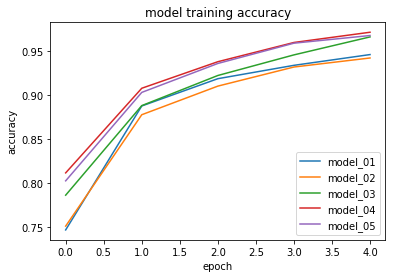

In [34]:
plt.plot(model_01_result.history['acc'])
plt.plot(model_02_result.history['acc'])
plt.plot(model_03_result.history['acc'])
plt.plot(model_04_result.history['acc'])
plt.plot(model_05_result.history['acc'])

plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model_01','model_02','model_03','model_04','model_05'],loc = 'best')
plt.show()

In [35]:
model_json = model_01.to_json()
open('[NCTS]_Homework_Q10-1_Recurrent_Neural_Network_Model_01_DavidChi.json', 'w').write(model_json)
model_01.save_weights('[NCTS]_Homework_Q10-1_Recurrent_Neural_Network_Model_01_DavidChi.h5')

model_json = model_02.to_json()
open('[NCTS]_Homework_Q10-1_Recurrent_Neural_Network_Model_02_DavidChi.json', 'w').write(model_json)
model_02.save_weights('[NCTS]_Homework_Q10-1_Recurrent_Neural_Network_Model_02_DavidChi.h5')

model_json = model_03.to_json()
open('[NCTS]_Homework_Q10-1_Recurrent_Neural_Network_Model_03_DavidChi.json', 'w').write(model_json)
model_03.save_weights('[NCTS]_Homework_Q10-1_Recurrent_Neural_Network_Model_03_DavidChi.h5')

model_json = model_04.to_json()
open('[NCTS]_Homework_Q10-1_Recurrent_Neural_Network_Model_04_DavidChi.json', 'w').write(model_json)
model_04.save_weights('[NCTS]_Homework_Q10-1_Recurrent_Neural_Network_Model_04_DavidChi.h5')

model_json = model_05.to_json()
open('[NCTS]_Homework_Q10-1_Recurrent_Neural_Network_Model_05_DavidChi.json', 'w').write(model_json)
model_05.save_weights('[NCTS]_Homework_Q10-1_Recurrent_Neural_Network_Model_05_DavidChi.h5')